In [1]:
import datetime as dt
import os
import sys
sys.path.append(os.pardir)

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

from covid_19.plotting import plot_data, figsize

In [2]:
# data
confirmed_cases = np.loadtxt('../data/confirmed_cases.dat')
recovered_cases = np.loadtxt('../data/recovered_cases.dat')
death_cases = np.loadtxt('../data/death_cases.dat')

# 1st wave
epidemics_start_date = dt.datetime(2020, 2, 26)

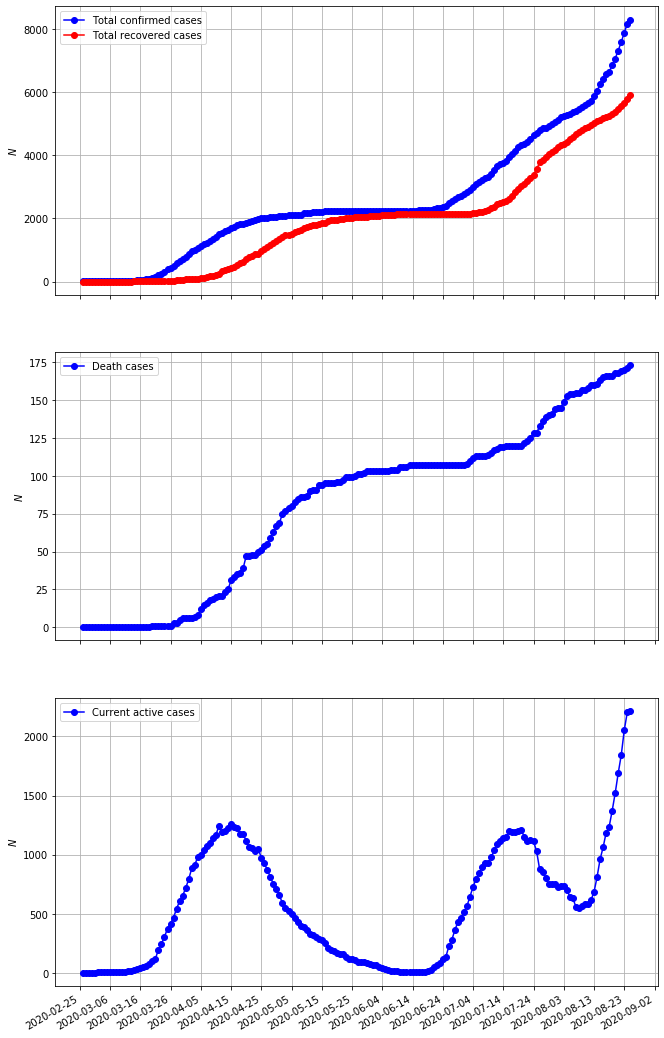

In [3]:
plot_data(
    epidemics_start_date, 
    confirmed_cases, 
    recovered_cases, 
    death_cases,
)

In [4]:
def averaged_new_cases_v_total_cases(confirmed_cases, avg_period=7):
    """Plot averaged new cases over total cases in time.

    Parameters
    ----------
    confirmed_cases : numpy.ndarray
        Number of confirmed infected COVID-19 cases per day.
    avg_period : int, optional
        Averaging period, number of days.
    """
    iterations = confirmed_cases.size
    confirmed_cases_periodically = []
    epoch = 0
    while epoch < iterations:
        confirmed_cases_periodically.append(confirmed_cases[epoch])
        epoch += avg_period
    confirmed_cases_periodically = np.array(confirmed_cases_periodically)
    
    new_cases = []
    for epoch, csp in enumerate(confirmed_cases_periodically):
        if epoch==0:
            new_cases.append(csp)
        else: 
            new_cases.append(confirmed_cases_periodically[epoch] - confirmed_cases_periodically[epoch-1])
    new_cases = np.array(new_cases)

    _x = np.linspace(0, np.max(confirmed_cases_periodically))

    fig = plt.figure(figsize=figsize(1.5, 1))
    ax = fig.add_subplot(111)
    ax.loglog(confirmed_cases_periodically, new_cases, 'b-', label='Measured data')
    ax.plot(_x, _x, 'k:', label='Exponential growth') # exponential growth ground truth
    ax.set_xlabel('$N_{total}$')
    ax.set_ylabel('$N_{new}$')
    ax.grid()
    ax.legend()
    plt.show()

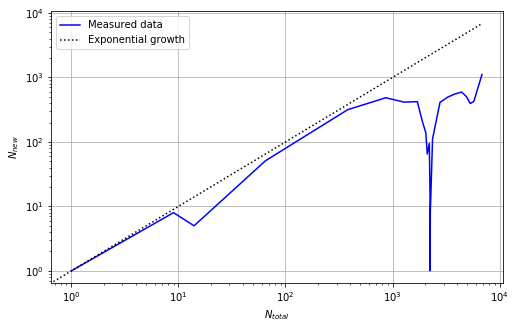

In [5]:
averaged_new_cases_v_total_cases(confirmed_cases)